In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
class Agent:

    def __init__(self):
        self.no_of_product = 0
        self.price_of_product = 0
        self.money = 0

    def __init__(self, initial_wealth):
        self.no_of_product = 0
        self.price_of_product = 0
        self.money = initial_wealth

    def allot_goods(self):
        self.no_of_product = random.randint(1, 10)  # allocate a random number of goods between 1 and 10
        self.price_of_product = random.randint(10, 100)  # allocate a random price between 10.00 and 100.00

    def allot_money(self):
        self.money = random.randint(100,500)


    def buy_goods(self, seller, quantity, amount):
          self.money -= amount
          seller.money += amount


In [3]:
class Simulation:

    def __init__(self, num_agents, initial_wealth, num_time_steps, probability_dist, buy_prob, tax_rate):
        self.num_agents = num_agents
        self.initial_wealth = initial_wealth
        self.num_time_steps = num_time_steps
        self.probability_dist = probability_dist
        self.buy_prob = buy_prob
        self.tax_rate = tax_rate
        self.agents = [Agent(initial_wealth) for _ in range(num_agents)]
        self.total_tax = 0

    def update_agents(self):
        random_indices = random.sample(range(self.num_agents), 2)
        agent1, agent2 = self.agents[random_indices[0]], self.agents[random_indices[1]]

        # Apply taxation: we assume that prior to trade a fixed fraction τ of money is taxed from both the agents.
        # self.total_tax += agent1.money * self.tax_rate + agent2.money * self.tax_rate
        # agent1.money -= agent1.money * self.tax_rate
        # agent2.money -= agent2.money * self.tax_rate

        if random.random() < self.buy_prob:
            if agent1.money >= agent2.price_of_product:

                # Calculate transaction amount based on the formula provided
                transaction_amount = 0.2*(agent1.money * agent2.money) / (agent1.money + agent2.money)

                agent1.buy_goods(agent2, 1, transaction_amount)
                # Randomly adjust the number of goods and price
                agent2.no_of_product += random.randint(-1, 1)
                agent2.price_of_product += random.uniform(-10, 10)

    def update_agents(self):
        random_indices = random.sample(range(self.num_agents), 2)
        agent1, agent2 = self.agents[random_indices[0]], self.agents[random_indices[1]]

        if random.random() < self.buy_prob:
              # Calculate transaction amount based on the formula provided
              transaction_amount = 0.2 * (agent1.money * agent2.money) / (agent1.money + agent2.money)


              agent1.consume(agent2, 1, transaction_amount)

    def deduct_tax(self):
        for agent in self.agents:
          tax=self.calculate_tax(agent.money)
          agent.money -= tax
          self.total_tax+=tax
        print("post tax:",np.sum(agent.money for agent in self.agents)/10000)


    def redist(self):
        add_val=self.total_tax/self.num_agents
        for agent in self.agents:
          agent.money+=add_val
        print("post redist",np.sum(agent.money for agent in self.agents)/10000)
        self.total_tax=0

    def run_simulation(self):
        for _ in range(self.num_time_steps):
            self.update_agents()

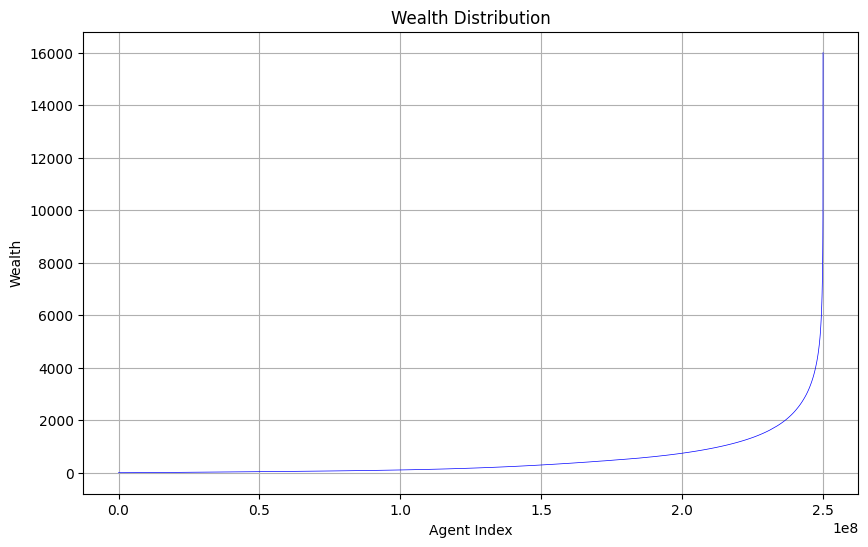

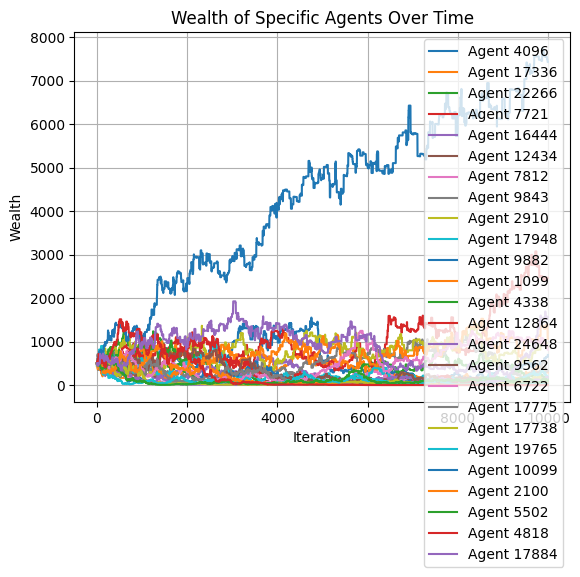

In [4]:
import matplotlib.pyplot as plt
import random

# Initialize an empty list to store wealth distributions
all_wealth_distributions = []

num_agents = 25000
initial_wealth = 500
num_time_steps = 10000
probability_dist = (0.05, 0.95)

# Initialize lists to store the wealth of specific agents over time
num_random_agents = 25
agent_wealth_over_time = {i: [] for i in random.sample(range(num_agents), num_random_agents)}

sim = Simulation(num_agents, initial_wealth, num_time_steps, probability_dist, 0.1, 0.0375)

# Run the simulation and collect wealth distributions
for i in range(num_time_steps):
    sim.run_simulation()
    wealth_distribution = [agent.money for agent in sim.agents]
    all_wealth_distributions.append(wealth_distribution)

    # Store the wealth of specific agents over time
    for agent_id in agent_wealth_over_time:
        agent_wealth_over_time[agent_id].append(sim.agents[agent_id].money)

# Flatten the list of wealth distributions
flattened_wealth_distributions = [wealth for distribution in all_wealth_distributions for wealth in distribution]

# Plot the wealth distribution curve
plt.figure(figsize=(10, 6))
plt.plot(sorted(flattened_wealth_distributions), color='blue', linewidth=0.5)
plt.title('Wealth Distribution')
plt.xlabel('Agent Index')
plt.ylabel('Wealth')
plt.grid(True)
plt.show()

# Plot the wealth of specific agents over time as smooth curves
for agent_id, wealth_list in agent_wealth_over_time.items():
    plt.plot(range(len(wealth_list)), wealth_list, label=f'Agent {agent_id}')
plt.title('Wealth of Specific Agents Over Time')
plt.xlabel('Iteration')
plt.ylabel('Wealth')
plt.grid(True)
plt.show()